In [160]:
import cv2
import matplotlib.pyplot as plt
from IPython import get_ipython
ipy = get_ipython()
if ipy is not None:
    ipy.run_line_magic('matplotlib', 'inline')

In [161]:
img1 = cv2.imread("D:\Dev\OpenCV\images\cat.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("D:\Dev\OpenCV\images\do_not_copy.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

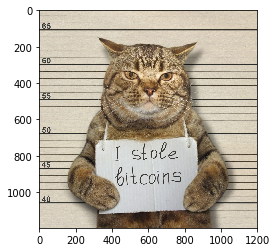

In [211]:
plt.imshow(img1)

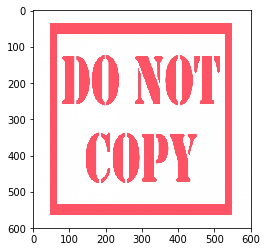

In [212]:
plt.imshow(img2)

In [213]:
img1.shape

(1197, 1200, 3)

In [214]:
img2.shape

(600, 600, 3)

In [215]:
# BLENDING IMAGES OF THE SAME SIZE
img1 = cv2.resize(img1, (1200, 1200))
img2 = cv2.resize(img2, (1200, 1200))

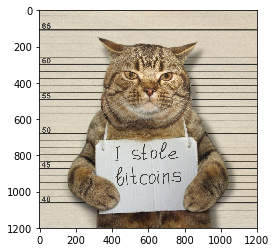

In [218]:
plt.imshow(img1)

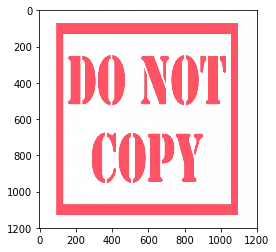

In [228]:
plt.imshow(img2)

In [231]:
blended = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma=10)

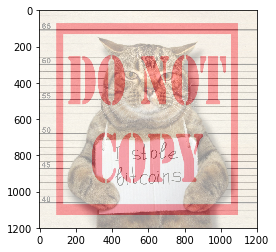

In [232]:
plt.imshow(blended)

In [233]:
# OVERLAY SMALL IMAGE ON TOP OF A LARGER IMAGE (NO BLENDING)
# Numpy reassignment

In [234]:
img1 = cv2.imread("D:\Dev\OpenCV\images\cat.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("D:\Dev\OpenCV\images\do_not_copy.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [235]:
img2 = cv2.resize(img2, (600, 600))

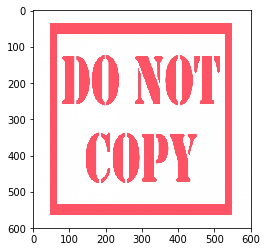

In [236]:
plt.imshow(img2)

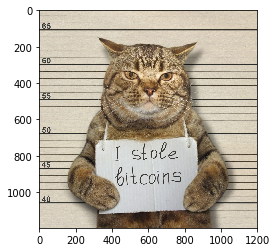

In [237]:
plt.imshow(img1)

In [238]:
lg_img = img1
sm_img = img2

In [239]:
x_offset = 0
y_offset = 0

In [240]:
x_end = x_offset + sm_img.shape[1]
y_end = y_offset + sm_img.shape[0]

In [241]:
lg_img[y_offset:y_end, x_offset:x_end] = sm_img

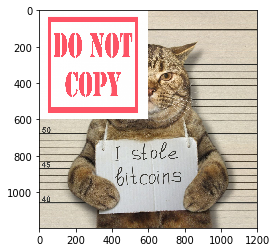

In [243]:
plt.imshow(lg_img)

In [244]:
# BLEND Together images of different sizes

In [269]:
img1 = cv2.imread("D:\Dev\OpenCV\images\cat.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("D:\Dev\OpenCV\images\do_not_copy.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [270]:
img2 = cv2.resize(img2, (600, 600))

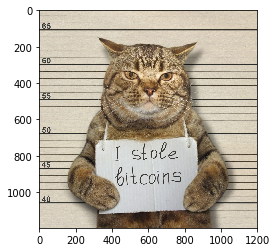

In [271]:
plt.imshow(img1)

In [272]:
img1.shape

(1197, 1200, 3)

In [273]:
x_offset = 1200 - 600
y_offset = 1197 - 600

In [275]:
img2.shape

(600, 600, 3)

In [276]:
rows, cols, channels = img2.shape

In [277]:
rows

600

In [278]:
cols

600

In [279]:
channels

3

In [280]:
roi = img1[y_offset:1197, x_offset:1200]

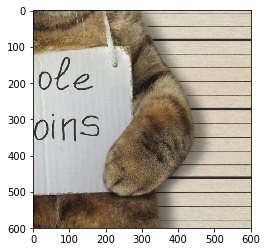

In [282]:
plt.imshow(roi)

In [283]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

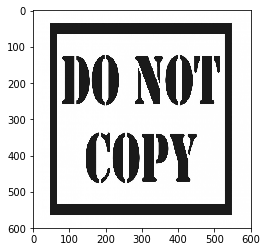

In [285]:
plt.imshow(img2gray, cmap='gray')

In [286]:
mask_inv = cv2.bitwise_not(img2gray)

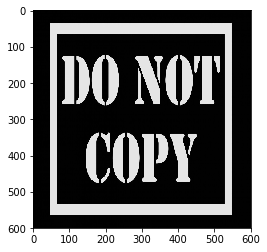

In [287]:
plt.imshow(mask_inv, cmap='gray')

In [288]:
mask_inv.shape

(600, 600)

In [289]:
import numpy as np

In [290]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [291]:
white_background.shape

(600, 600, 3)

In [298]:
bg = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

In [302]:
bg.shape

(600, 600, 3)

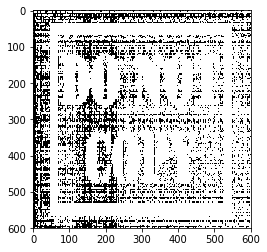

In [303]:
plt.imshow(bg)

In [304]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

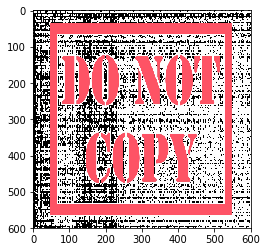

In [305]:
plt.imshow(fg)

In [307]:
final_roi = cv2.bitwise_or(roi, fg)

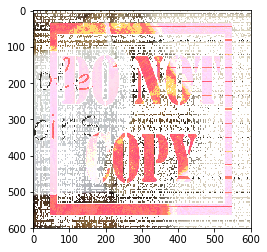

In [308]:
plt.imshow(final_roi)

In [309]:
lg_img = img1
sm_img = final_roi

In [310]:
lg_img[y_offset:y_offset+sm_img.shape[0], x_offset:x_offset+sm_img.shape[1]] = sm_img

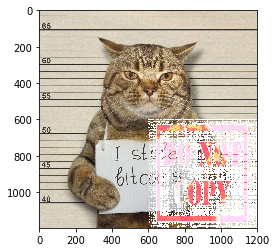

In [311]:
plt.imshow(lg_img)